# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [9]:
import main

import math
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from typing import Union, List, Tuple


%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [10]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

# for size in [100, 1000, 10000]:
#     print('SIZE: ', size)
#     print('Timing: ')
#     saved_timing = %timeit -r 5 -n 10 -o func(size)
#     saved_timing.average   # średni czas próby
#     saved_timing.stdev     # odchylenie standardowe
#     print('Memory usage: ')
#     %memit func(size)
#     print('\n')

***Zadanie 1.***  
Zaimplementuj funkcje obliczające błąd względny i bezwzględny (*relative_error* i *absolut_error*).
Funkcje przyjmują 2 argumenty: wartość dokładną oraz wartość przybliżoną, zwracając wartość błędu.
Implementacja powinna obsługiwać zarówno wartości skalarne, listy oraz wektory i macierze typu np.array z zachowaniem zasad [broadcastingu](https://numpy.org/doc/stable/user/basics.broadcasting.html).

**Wskazówka** Wykorzystuj funkcje *relative_error* i *absolut_error* w dalszej części laboratorium do analizy błędów.

In [11]:
#Funkcja obliczająca błąd bezwzględny:

def absolut_error(v: Union[int, float, List, np.ndarray], v_aprox: Union[int, float, List, np.ndarray]) -> Union[int, float, np.ndarray]:
    if type(v) not in [int, float, list, np.ndarray] or type(v_aprox) not in [int, float, list, np.ndarray]: #ważne żeby było list a nie List bo to konkretny rodzaj z List
        print('tu cie mam')
        return np.nan
    if type(v) is int and type(v_aprox) is list:
        return [abs(v - x) for x in v_aprox]
    if type(v) is int and type(v_aprox) is list:
        return [abs(v_aprox - x) for x in v]
    if type(v) is list and type(v_aprox) is list:
        if len(v) == len(v_aprox):
            return [abs(v[i] - v_aprox[i]) for i in range(len(v))]
        else: 
            return np.nan
    if type(v) is np.ndarray and type(v_aprox) is np.ndarray and v.shape[0] != v_aprox.shape[0]:
            return np.nan
    return abs(v - v_aprox) #float i float, int i float, int i int, ndarray i ndarray

#Funkcja oblicająca błąd względny:

def relative_error(v: Union[int, float, List, np.ndarray], v_aprox: Union[int, float, List, np.ndarray]) -> Union[int, float, np.ndarray]:
    if type(v) not in [int, float, list, np.ndarray] or type(v_aprox) not in [int, float, list, np.ndarray]: #ważne żeby było list a nie List bo to konkretny rodzaj z List
        return np.nan
    if (type(v) is np.ndarray or type(v) is list):
        if 0 in v:
            return np.nan
    elif v == 0:
        return np.nan
    if type(v) is int and type(v_aprox) is list:
        return [abs((v - x)/v) for x in v_aprox]
    if type(v) is int and type(v_aprox) is list:
        return [abs((v_aprox - x)/x) for x in v]
    if type(v) is list and type(v_aprox) is list:
        if len(v) == len(v_aprox):
            return [abs((v[i] - v_aprox[i]) / v[i]) for i in range(len(v))]
        else: 
            return np.nan
    if type(v) is np.ndarray and type(v_aprox) is np.ndarray and v.shape[0] != v_aprox.shape[0]:
            return np.nan
    return abs(np.divide(v - v_aprox,v)) #float i float, int i float, int i int, ndarray i ndarray

***Zadanie 2.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


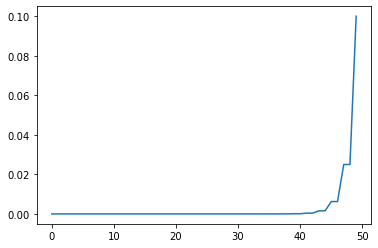

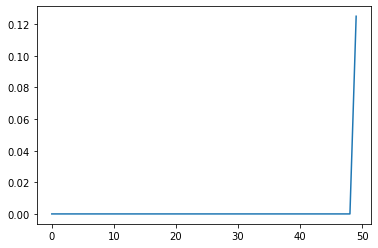

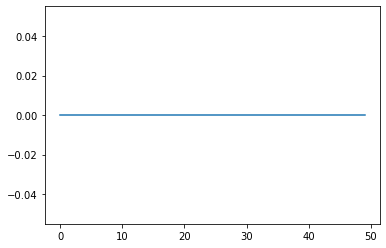

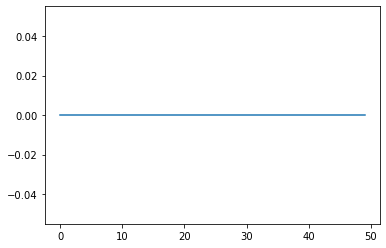

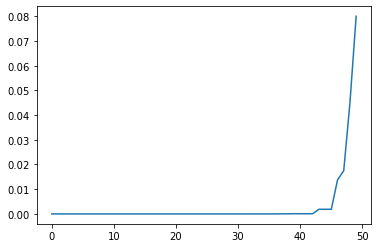

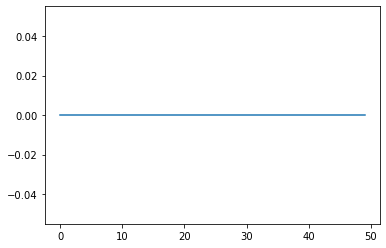

In [12]:
def p_diff(n: int, c: float) -> float:
    if type(n) not in [int, np.int32] or type(c) not in [int, float, np.int32, np.float64]:
        return np.nan
    b = 2**n
    P1 = (b-b)+c
    P2 = (b+c)-b
    return absolut_error(P1,P2)


result = [[p_diff(n,c) for c in [0.1,0.125,0,25,0.33,0.5,0.6]] for n in range(1,51)]

c1 = [result[i][0] for i in range(50)] #dlaczego nie działa result[:][0]?
c125 = [result[i][1] for i in range(50)]
c25 = [result[i][2] for i in range(50)]
c33 = [result[i][3] for i in range(50)]
c5 = [result[i][4] for i in range(50)]
c6 = [result[i][5] for i in range(50)]

cs = [c1, c125, c25, c33, c5, c6]

for c in cs:
    plt.plot(c)
    plt.show()

1. Oba wyrażenia po uporządkowaniu są sobie równe, więc powinniśmy otrzymać taki sam wynik dla P1 oraz dla P2.
2. Liczby stałoprzecinkowe mają skończoną reprezentacje (b^n), liczby zmiennoprzecinkowe mają nieskończoną reprezentację (c).
3. Wykonujemy obliczenia w różnej kolejności, w pierwszym przypadku najpierw odejmujemy od siebie dwie liczby stałoprzecinkowe, następnie dodajemy liczbę zmiennoprzecinkową, w drugim przypadku najpierw działamy na liczbie zmiennoprzecinkowej i stałoprzecinkowej (co wymaga odpowiedniego przesunięcia liczby w zapisie binarnym (dodania zer)) a następnie dodajemy liczbę stałoprzecinkową. Właśnie przez to dopisywanie zer w postaci binarnej tracimy część informacji.
4. Jest to błąd reprezentacji.
5. Można na przykład zauważyć, że b-b wynosi 0 i napisać tylko P3 = c.

***Zadanie 3.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

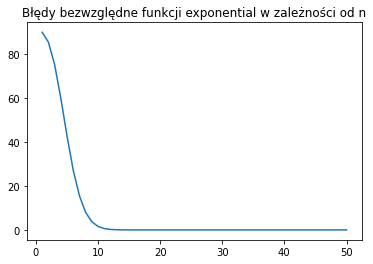

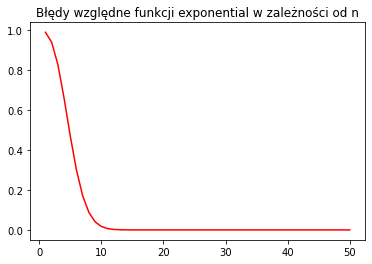

In [13]:
def exponential(x: Union[int, float], n: int) -> float:
    if type(n) is not int or type(x) not in [int, float] or n<=0:
        return np.nan   
    res: float = 0.0
    for i in range(0,n):
        res=res + 1/math.factorial(i)*x**i
    return res

# Sprawdzam działanie mojej funkcji w porównaniu z funkcją numpy.exp

res_exact = math.exp(4.51231145)


ns = [n for n in range(1,51)]
relatives = [relative_error(res_exact,exponential(4.51231145,n)) for n in range(1,51)]
absolutes = [absolut_error(res_exact,exponential(4.51231145,n)) for n in range(1,51)]


fig, ax1=plt.subplots()
ax1.plot(ns,absolutes)
ax1.set(title="Błędy bezwzględne funkcji exponential w zależności od n")
plt.show()

fig, ax2 = plt.subplots()
ax2.plot(ns,relatives,'r')
ax2.set(title="Błędy względne funkcji exponential w zależności od n")
plt.show()

1. Powyższy przykład obrazuje błąd obcięcia wynikający z liczenia szeregu tylko dla jakiejś konkretnej wartości N a nie do nieskończoności.
2. Z wykresów można wywnioskować, że błędy maleją wraz ze wzrostem n przy czym przy n równym około 10 przybliżenie jest już bardzo dobre i nie poprawia się znacznie przy większych wartościach.

***Zadania 4.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

In [14]:
#Metoda 1:

def coskx1(k: int, x: Union[int, float]) -> float:
    if type (k) is not int or type(x) not in [int, float]:
        return np.nan
    if k < 0:
        return np.nan
    if x == 0:
        return np.cos(0)
    if k == 1 or k == 0:
        return np.cos(k*x)
    else:
        return (2*np.cos(x)*coskx1(k-1,x)) - coskx1(k-2,x) 

#Metoda 2:

def coskx2(k: int, x: Union[int, float]) -> Tuple[float, float]:
    if type(k) is not int or type(x) not in [int, float]:
        return np.nan
    if k < 0:
        return np.nan
    if x == 0:
        return np.cos(0),np.sin(0)
    if k == 1 or k == 0:
        return np.cos(k*x), np.sin(k*x)
    return np.cos(x) * coskx2(k-1,x)[0] - np.sin(x) * coskx2(k-1,x)[1], np.sin(x) * coskx2(k-1,x)[0] + np.cos(x) * coskx2(k-1,x)[1]

print("Dla k = -5 i x = 2 \n\n Wynik działania funkcji coskx1: ",coskx1(-5,2),"\n wynik dzialania funkcji coskx2: ",coskx2(-5,2))

print("Dla k = 2 i x = 2 \n\n Wynik działania funkcji coskx1: ",coskx1(2,2),"\n wynik dzialania funkcji coskx2: ",coskx2(2,2))

print("Dla k = 10 i x = 2 \n\n Wynik działania funkcji coskx1: ",coskx1(10,2),"\n wynik dzialania funkcji coskx2: ",coskx2(10,2))

Dla k = -5 i x = 2 

 Wynik działania funkcji coskx1:  nan 
 wynik dzialania funkcji coskx2:  nan
Dla k = 2 i x = 2 

 Wynik działania funkcji coskx1:  -0.6536436208636118 
 wynik dzialania funkcji coskx2:  (-0.6536436208636119, -0.7568024953079283)
Dla k = 10 i x = 2 

 Wynik działania funkcji coskx1:  0.4080820618133919 
 wynik dzialania funkcji coskx2:  (0.408082061813392, 0.912945250727628)


Dla k = -2 funkcja zwraca wartość nan (zgodnie z założeniami).
Dla k = 2 funkcja coskx1 zwraca wartość, która różni się od wartości zwracanej przez funkcję coskx2 ostatnią wyświetlaną liczbą po przecinku.
Dla k = 10 liczby różnią się 3 ostatnimi wyświetlanymi po przecinku liczbami.

Dla k = 50 czas wywoływania funkcji jest bardzo długi.

***Zadanie 5.***  
Wiedząc, że
$\begin{aligned}
\sum_{n=1}^{\infty} \cfrac{1}{n^2} = \cfrac{1}{6} \pi^2
\end{aligned}$,
napisz kod w Pythonie (funkcja *pi*) obliczający przybliżenie liczby pi (nie korzystaj ze stałych <i>numpy.pi</i>, <i>math.pi</i> itp.). 

1. Z jakimi rodzajami błędów numerycznych mamy tu do czynienia? 
2. Sporządź wykresy błędów bezwzględnych i względnych w stosunku do stałej numpy.pi w zależności od wartości $n$.  

**Wskazówka** Do wizualizacji wyników użyj skali logarytmicznej.

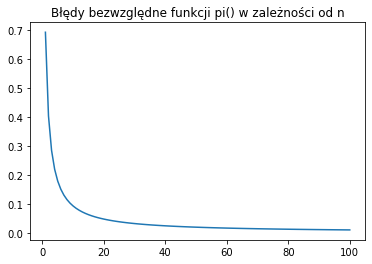

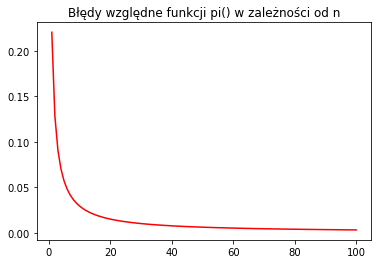

In [15]:
def pi(n: int) -> float:
    if type(n) is not int or n<=0:
        return np.nan
    pi_approx = 0
    for i in range(1,n+1):
        pi_approx = pi_approx + 1/i**2
    return math.sqrt(6*pi_approx)


ns = [n for n in range(1,101)]
relatives = [relative_error(np.pi,pi(n)) for n in range(1,101)]
absolutes = [absolut_error(np.pi,pi(n)) for n in range(1,101)]

fig, ax1=plt.subplots()
ax1.plot(ns,absolutes)
ax1.set(title="Błędy bezwzględne funkcji pi() w zależności od n")
plt.show()

fig, ax2 = plt.subplots()
ax2.plot(ns,relatives,'r')
ax2.set(title="Błędy względne funkcji pi() w zależności od n")
plt.show()

1. W tym przypadku mamy do czynienia z błędami obcięcia, które powstają na skutek zmniejszenia liczby działań, które wykonujemy, aby obliczyć daną wartość. W naszym przypadku mamy szereg, który powinien dążyć do nieskończoności, jednak z wiadomych przyczyn nie możemy liczyć w nieskończoność - jest to więc typowy przykład błędu obcięcia.

2. Sporządzam wykresy błędów bezwzględnych i względnych w stosunku stałej numpy.pi w zależności od wartości n. Z wykresu można odczytać, że błędy naszego przybliżenia maleją wraz ze wzrostem n, przy czym jakość naszego przybliżenia bardzo widocznie zmienia się dla n mniejszych niż 20 a sensowana wartość n, którą bym wybrał dla przybliżenia do około 60.

[0.6921029108066152, 0.4029798660639625, 0.28385462034275166, 0.2189796674647626, 0.17820495255122237, 0.15021615884137463, 0.1298187057435789, 0.11429479693195033, 0.10208506402873985, 0.09223101760772323, 0.08411114688223043, 0.07730483575586522, 0.07151728169657279, 0.06653573801843171, 0.0622028275577069, 0.05839963325033937, 0.05503462783607915, 0.052036218620012065, 0.04934760128909632, 0.04692312947608901, 0.04472570364586481, 0.04272486036758405, 0.04089535219461515, 0.03921607722998477, 0.0376692618892176, 0.03623982964353889, 0.03491490817333753, 0.03368344077640062, 0.03253587717947504, 0.031463925448530716, 0.030460351361624394, 0.02951881497870623, 0.0286337366040863, 0.027800186154060214, 0.027013791296660816, 0.02627066074975737, 0.02556731989747396, 0.024900656477138128, 0.024267874545811363, 0.02366645529041511, 0.023094123523226706, 0.022548818923221692, 0.022028671257103838, 0.021531978952021635, 0.021057190502717482, 0.02060288828513368, 0.020167774420773554, 0.0197

***Zadanie 6.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 4 w zalożności od różnych wartości $n$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby pi w zależności od $n$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby pi od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

21.7 µs ± 120 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)


Memory usage for pi: 
peak memory: 129.09 MiB, increment: 0.00 MiB
228 µs ± 1.28 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Memory usage for pi: 
peak memory: 129.09 MiB, increment: 0.00 MiB
692 µs ± 2.63 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Memory usage for pi: 
peak memory: 129.09 MiB, increment: 0.00 MiB
1.12 ms ± 54.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Memory usage for pi: 
peak memory: 129.09 MiB, increment: 0.00 MiB
1.5 ms ± 66.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Memory usage for pi: 
peak memory: 129.09 MiB, increment: 0.00 MiB
2.28 ms ± 23.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Memory usage for pi: 
peak memory: 129.10 MiB, increment: 0.00 MiB


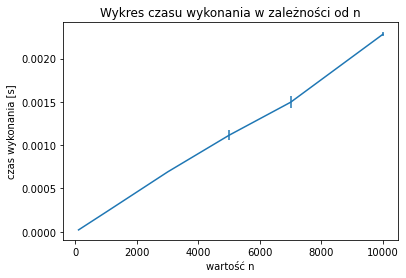

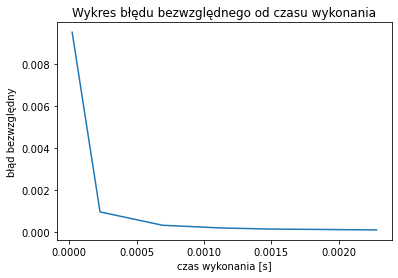

In [17]:
absolutes = list()
time_vector =list()
dev_vector=list()
ns=[100, 1000, 3000, 5000, 7000, 10000]
for n in ns:
    pi_timing = %timeit -r 5 -n 10 -o pi(n) 
    time_vector.append(pi_timing.average)   # średni czas próby
    dev_vector.append(pi_timing.stdev)     # odchylenie standardowe
    absolutes.append(absolut_error(np.pi,pi(n)))
    print('\n\nMemory usage for pi: ')
    %memit pi(n) #możemy zaobserować, że użycie pamięci jest niezależne od n
 


fig, ax1 = plt.subplots()
ax1.errorbar(ns,time_vector,yerr=dev_vector)
ax1.set(title="Wykres czasu wykonania w zależności od n",xlabel='wartość n',ylabel='czas wykonania [s]') #wykres jest liniowy, można więc założyć, że złożoność obliczeniowa algorytmu jest także liniowa O(n)
fig.show()

fig, ax2 = plt.subplots()
ax2.plot(time_vector,absolutes)
ax2.set(title="Wykres błędu bezwzględnego od czasu wykonania",xlabel='czas wykonania [s]',ylabel='błąd bezwzględny')
fig.show()

